In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Load Data
df = pd.read_csv('/kaggle/input/datasets/shadalishah/dubai-real-estate-insights/bayut_selling_properties.csv')

print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape: (41381, 22)

First 5 rows:


,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,...,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,...,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,...,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale
3,980000,Average,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,73384,...,0,0,0,0,Al Reef,Abu Dhabi,UAE,24.466437,54.656891,For Sale
4,2499999,Medium,Townhouse,3,4,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,0,...,0,0,0,0,The Valley,Dubai,UAE,25.019221,55.447201,For Sale


 **Basic Information**

In [2]:
print("=== Dataset Info ===")
print(df.info())

print("\n=== Missing Values ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

print("\n=== Basic Statistics ===")
df.describe()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
count,4.138100e+04,41381.000000,41381.000000,4.138100e+04,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,41363.000000,41363.000000
mean,3.788624e+06,2.190957,3.007540,9.292880e+04,681.112491,172.559073,13.212126,142.931273,2.304463,25.037851,55.158407
std,8.482870e+06,1.567855,1.785553,2.503703e+05,953.886883,353.899074,20.298365,248.719849,4.440953,0.437348,0.513871
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.175847,43.351928
25%,1.100000e+06,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.026710,55.135252
50%,2.000000e+06,2.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.078641,55.245999
75%,3.600000e+06,3.000000,4.000000,1.243790e+05,2012.000000,198.000000,22.000000,211.000000,4.000000,25.189427,55.307913
max,4.825000e+08,11.000000,11.000000,2.807952e+07,2024.000000,2929.000000,89.000000,997.000000,42.000000,25.797689,56.361294


**Price Distribution**

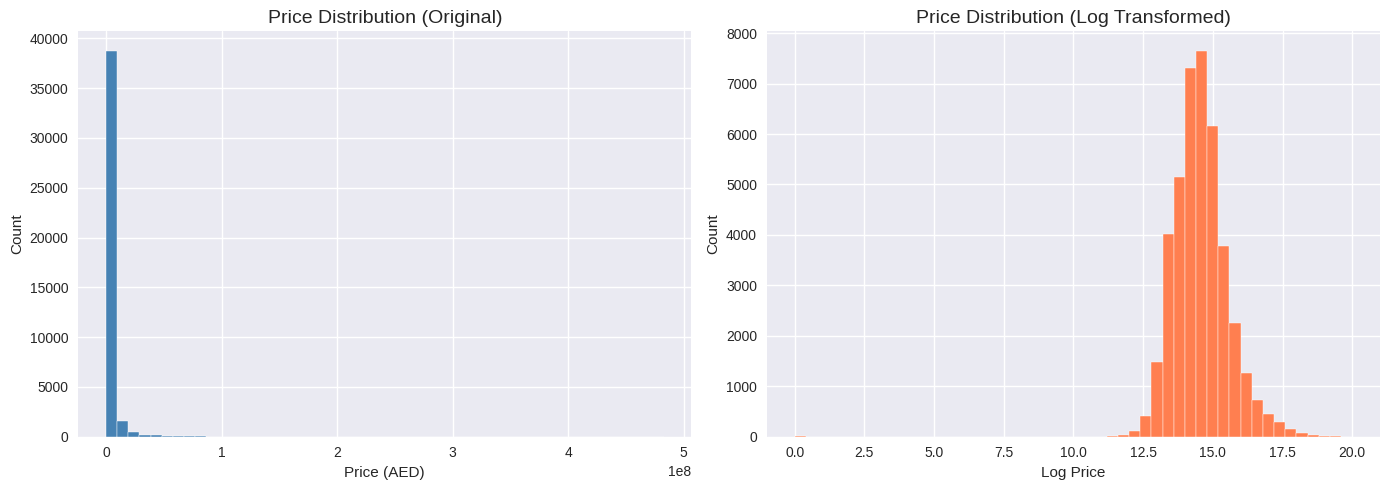

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original price
axes[0].hist(df['price'], bins=50, color='steelblue', edgecolor='white')
axes[0].set_title('Price Distribution (Original)', fontsize=14)
axes[0].set_xlabel('Price (AED)')
axes[0].set_ylabel('Count')

# Log price
axes[1].hist(np.log1p(df['price']), bins=50, color='coral', edgecolor='white')
axes[1].set_title('Price Distribution (Log Transformed)', fontsize=14)
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('price_distribution.png', dpi=150)
plt.show()

**Price by City**

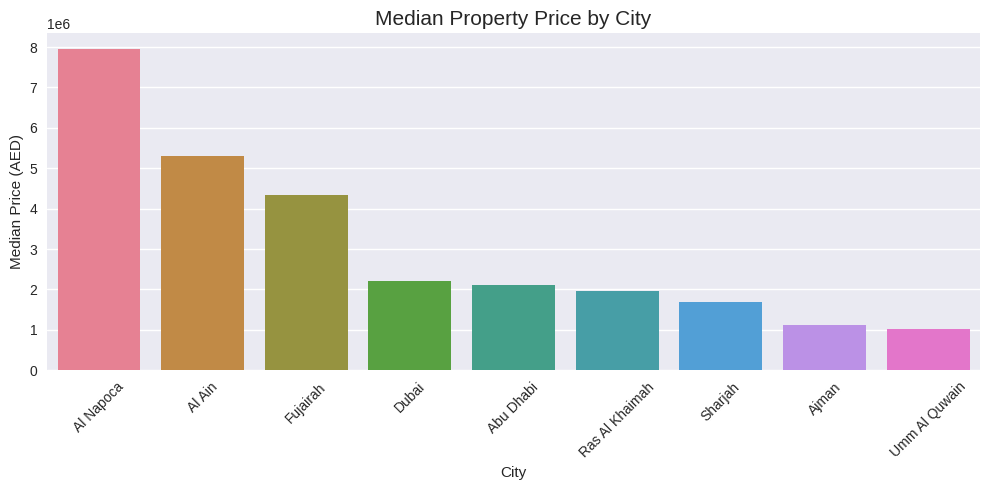

In [4]:
plt.figure(figsize=(10, 5))
city_price = df.groupby('city')['price'].median().sort_values(ascending=False)
sns.barplot(x=city_price.index, y=city_price.values, palette='husl')
plt.title('Median Property Price by City', fontsize=15)
plt.xlabel('City')
plt.ylabel('Median Price (AED)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('price_by_city.png', dpi=150)
plt.show()

**Price by Property Type** 

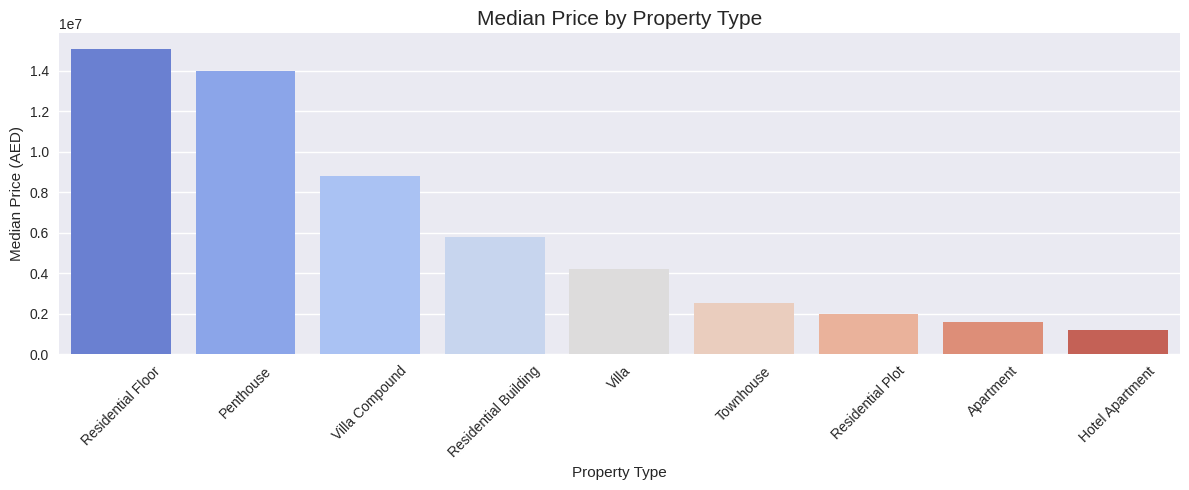

In [5]:
plt.figure(figsize=(12, 5))
type_price = df.groupby('type')['price'].median().sort_values(ascending=False)
sns.barplot(x=type_price.index, y=type_price.values, palette='coolwarm')
plt.title('Median Price by Property Type', fontsize=15)
plt.xlabel('Property Type')
plt.ylabel('Median Price (AED)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('price_by_type.png', dpi=150)
plt.show()

**Price by Beds & Baths**

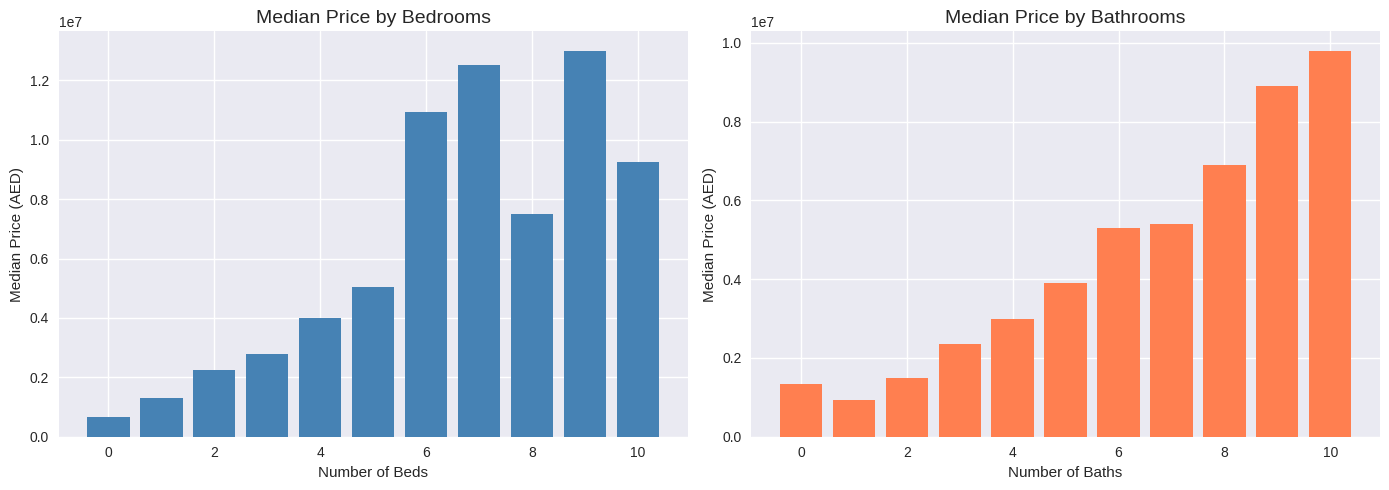

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Beds
bed_price = df[df['beds'] <= 10].groupby('beds')['price'].median()
axes[0].bar(bed_price.index, bed_price.values, color='steelblue')
axes[0].set_title('Median Price by Bedrooms', fontsize=14)
axes[0].set_xlabel('Number of Beds')
axes[0].set_ylabel('Median Price (AED)')

# Baths
bath_price = df[df['baths'] <= 10].groupby('baths')['price'].median()
axes[1].bar(bath_price.index, bath_price.values, color='coral')
axes[1].set_title('Median Price by Bathrooms', fontsize=14)
axes[1].set_xlabel('Number of Baths')
axes[1].set_ylabel('Median Price (AED)')

plt.tight_layout()
plt.savefig('price_by_beds_baths.png', dpi=150)
plt.show()

**Furnished vs Unfurnished**

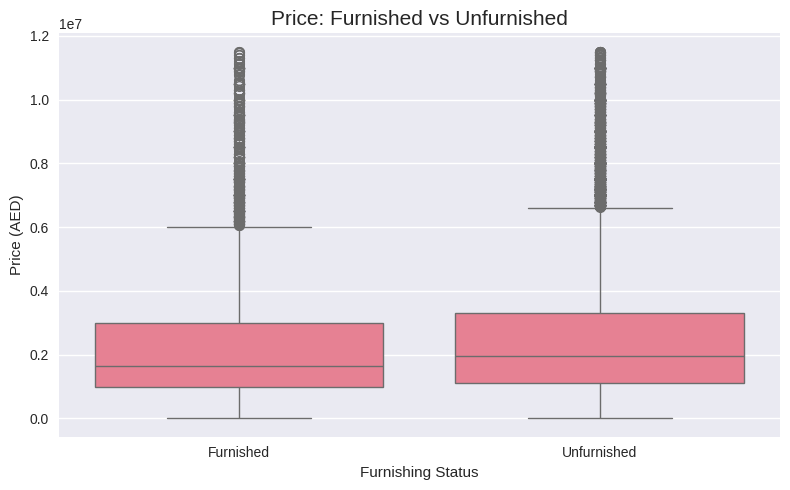

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='furnishing', y='price', data=df[df['price'] < df['price'].quantile(0.95)])
plt.title('Price: Furnished vs Unfurnished', fontsize=15)
plt.xlabel('Furnishing Status')
plt.ylabel('Price (AED)')
plt.tight_layout()
plt.savefig('furnished_vs_unfurnished.png', dpi=150)
plt.show()

**Ready vs Off-Plan**

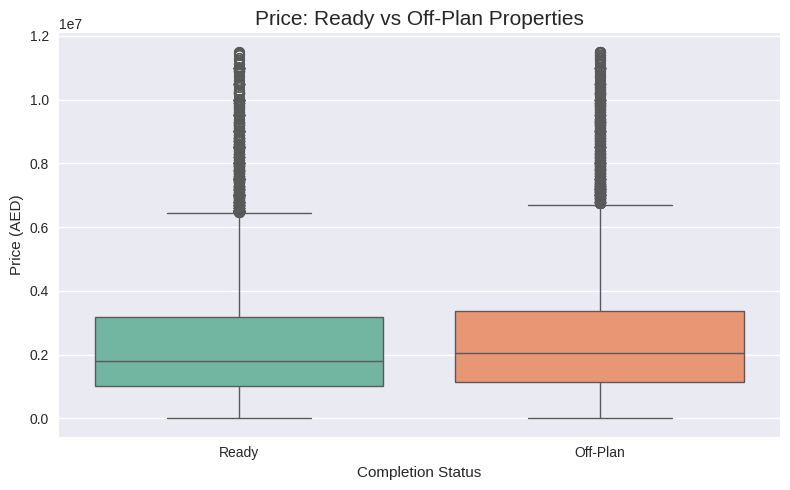

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='completion_status', y='price',
            data=df[df['price'] < df['price'].quantile(0.95)],
            palette='Set2')
plt.title('Price: Ready vs Off-Plan Properties', fontsize=15)
plt.xlabel('Completion Status')
plt.ylabel('Price (AED)')
plt.tight_layout()
plt.savefig('ready_vs_offplan.png', dpi=150)
plt.show()

**Price Category Distribution**

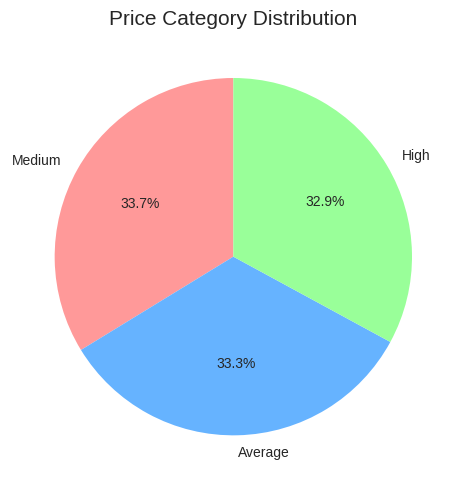

In [9]:
plt.figure(figsize=(8, 5))
df['price_category'].value_counts().plot(kind='pie',
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99'],
    startangle=90)
plt.title('Price Category Distribution', fontsize=15)
plt.ylabel('')
plt.tight_layout()
plt.savefig('price_category.png', dpi=150)
plt.show()

**Top 10 Most Expensive Areas**

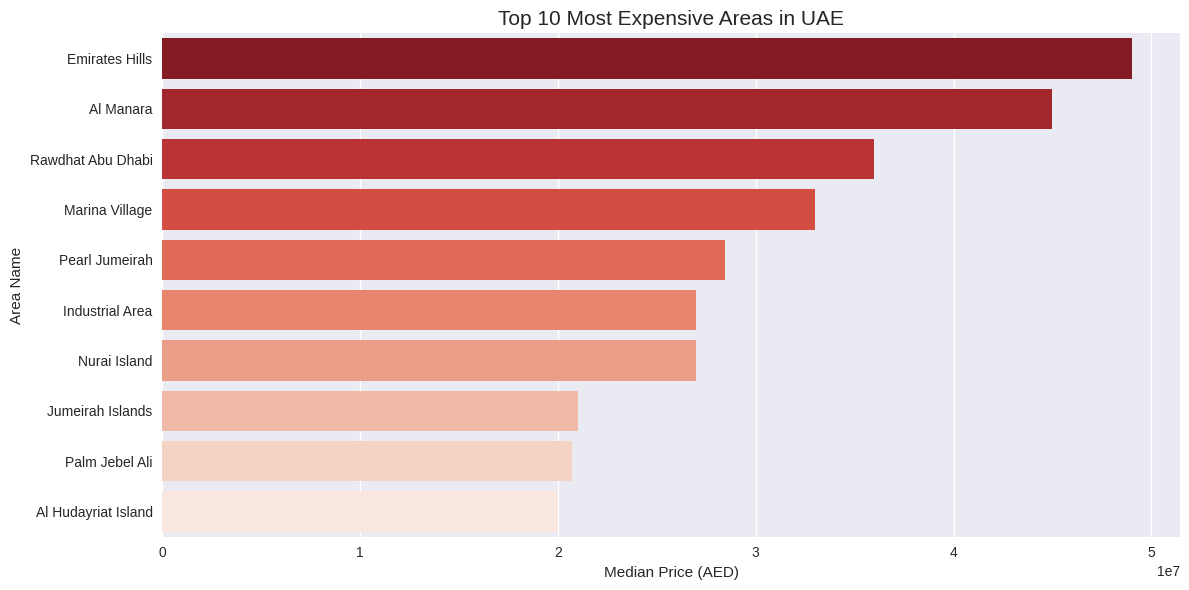

In [10]:
plt.figure(figsize=(12, 6))
top_areas = df.groupby('area_name')['price'].median().sort_values(ascending=False).head(10)
sns.barplot(x=top_areas.values, y=top_areas.index, palette='Reds_r')
plt.title('Top 10 Most Expensive Areas in UAE', fontsize=15)
plt.xlabel('Median Price (AED)')
plt.ylabel('Area Name')
plt.tight_layout()
plt.savefig('top_areas.png', dpi=150)
plt.show()

**Correlation Heatmap**

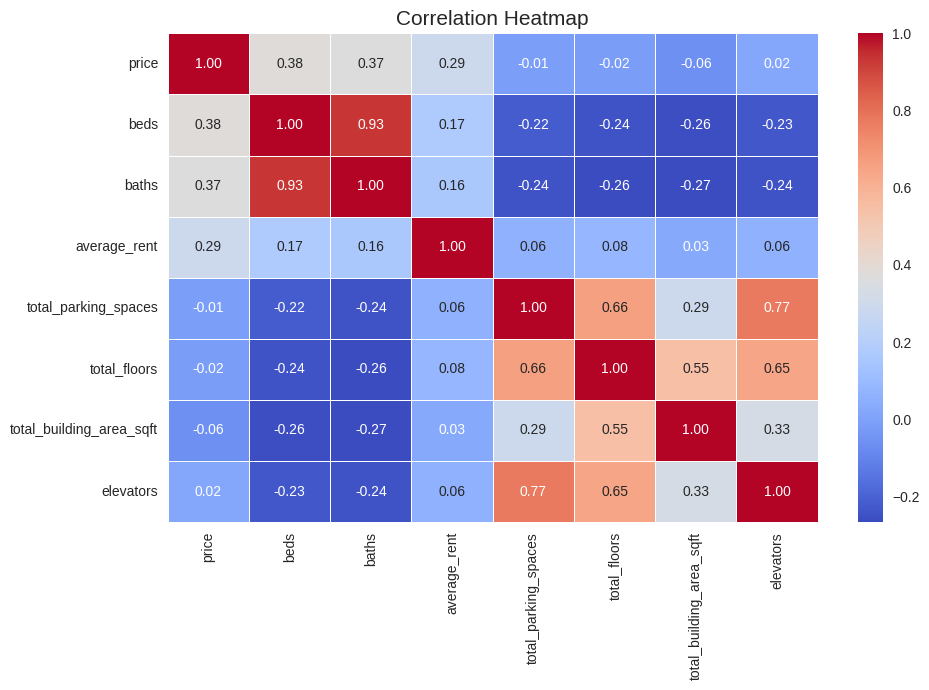

In [11]:
plt.figure(figsize=(10, 7))
num_cols = ['price', 'beds', 'baths', 'average_rent',
            'total_parking_spaces', 'total_floors',
            'total_building_area_sqft', 'elevators']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()

**Monthly Listings Trend**

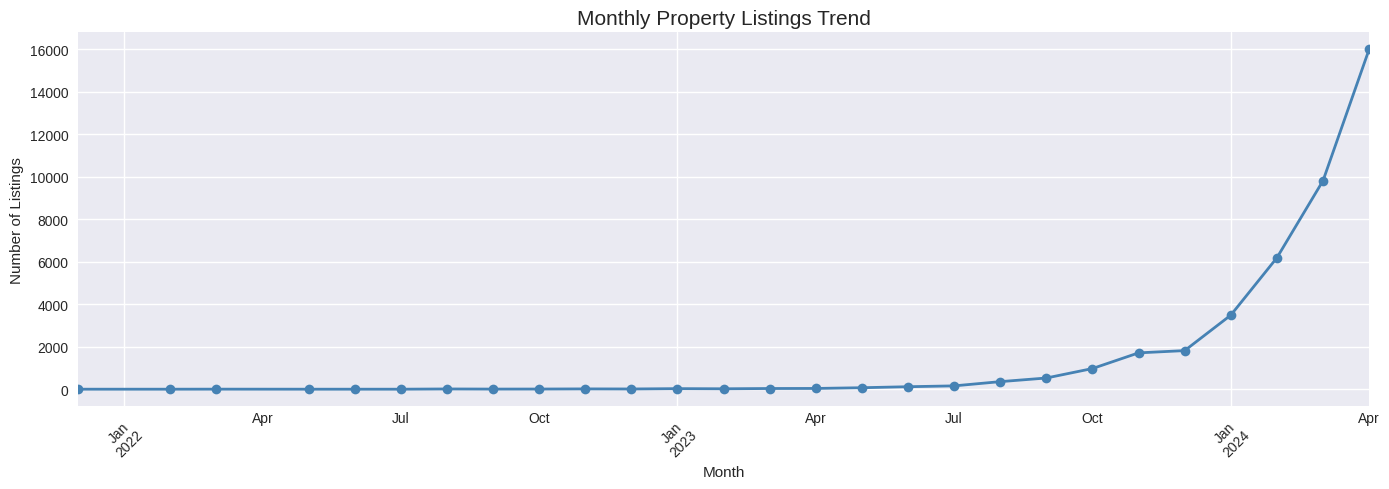

In [12]:
df['post_date'] = pd.to_datetime(df['post_date'])
df['month_year'] = df['post_date'].dt.to_period('M')

plt.figure(figsize=(14, 5))
monthly = df.groupby('month_year').size()
monthly.plot(kind='line', marker='o', color='steelblue', linewidth=2)
plt.title('Monthly Property Listings Trend', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_trend.png', dpi=150)
plt.show()

 **Key Insights Summary**

In [13]:
print("=" * 50)
print("📊 KEY INSIGHTS FROM EDA")
print("=" * 50)

print(f"\n✅ Total Properties: {len(df):,}")
print(f"✅ Cities Covered: {df['city'].nunique()}")
print(f"✅ Property Types: {df['type'].nunique()}")
print(f"✅ Total Areas: {df['area_name'].nunique()}")
print(f"\n💰 Price Statistics:")
print(f"   Min Price:    AED {df['price'].min():,.0f}")
print(f"   Max Price:    AED {df['price'].max():,.0f}")
print(f"   Mean Price:   AED {df['price'].mean():,.0f}")
print(f"   Median Price: AED {df['price'].median():,.0f}")
print(f"\n🏙️ Most Listings City: {df['city'].value_counts().index[0]}")
print(f"🏠 Most Common Type: {df['type'].value_counts().index[0]}")
print(f"📅 Date Range: {df['post_date'].min().date()} to {df['post_date'].max().date()}")

📊 KEY INSIGHTS FROM EDA

✅ Total Properties: 41,381
✅ Cities Covered: 9
✅ Property Types: 9
✅ Total Areas: 275

💰 Price Statistics:
   Min Price:    AED 0
   Max Price:    AED 482,500,000
   Mean Price:   AED 3,788,624
   Median Price: AED 2,000,000

🏙️ Most Listings City: Dubai
🏠 Most Common Type: Apartment
📅 Date Range: 2021-12-15 to 2024-04-25


**Data Preprocessing**

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load Data
df = pd.read_csv('/kaggle/input/datasets/shadalishah/dubai-real-estate-insights/bayut_selling_properties.csv')
print("Shape:", df.shape)

Shape: (41381, 22)


**Drop Useless Columns**

In [15]:
# country = all UAE, purpose = all For Sale (no value)
df.drop(columns=['country', 'purpose', 'address'], inplace=True)

print("✅ Dropped useless columns")
print("New Shape:", df.shape)

✅ Dropped useless columns
New Shape: (41381, 19)


**DateTime Feature Engineering**

In [16]:
df['post_date'] = pd.to_datetime(df['post_date'])

df['post_month']   = df['post_date'].dt.month
df['post_year']    = df['post_date'].dt.year
df['post_day']     = df['post_date'].dt.dayofweek
df['post_quarter'] = df['post_date'].dt.quarter

df.drop(columns=['post_date', 'month_year'], inplace=True, errors='ignore')

print("✅ DateTime features extracted")
print(df[['post_month','post_year','post_day','post_quarter']].head())

✅ DateTime features extracted
   post_month  post_year  post_day  post_quarter
0           4       2024         0             2
1           4       2024         0             2
2           4       2024         3             2
3           1       2024         2             1
4           2       2024         2             1


**DateTime Feature Engineering**

In [17]:
# Check if post_date exists first
if 'post_date' in df.columns:
    df['post_date'] = pd.to_datetime(df['post_date'])
    df['post_month']   = df['post_date'].dt.month
    df['post_year']    = df['post_date'].dt.year
    df['post_day']     = df['post_date'].dt.dayofweek
    df['post_quarter'] = df['post_date'].dt.quarter
    df.drop(columns=['post_date'], inplace=True)
    print("✅ DateTime features extracted")
else:
    print("⚠️ post_date already processed — skipping")

# Also safely drop month_year if exists
if 'month_year' in df.columns:
    df.drop(columns=['month_year'], inplace=True)

print(df[['post_month','post_year','post_day','post_quarter']].head())

⚠️ post_date already processed — skipping
   post_month  post_year  post_day  post_quarter
0           4       2024         0             2
1           4       2024         0             2
2           4       2024         3             2
3           1       2024         2             1
4           2       2024         2             1


**Handle Zero Values (Treat as Missing)**

In [18]:
zero_cols = [
    'average_rent',
    'total_parking_spaces',
    'total_floors',
    'total_building_area_sqft',
    'elevators'
]

for col in zero_cols:
    zeros = (df[col] == 0).sum()
    print(f"{col}: {zeros} zeros replaced with median")
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

print("\n✅ Zero values handled")

average_rent: 20762 zeros replaced with median
total_parking_spaces: 28366 zeros replaced with median
total_floors: 23492 zeros replaced with median
total_building_area_sqft: 23609 zeros replaced with median
elevators: 28289 zeros replaced with median

✅ Zero values handled


**Handle Missing Values**

In [19]:
print("Missing values before:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Numeric columns — fill with median
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns — fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values handled")
print("Missing values after:")
print(df.isnull().sum().sum())

Missing values before:
Latitude     18
Longitude    18
dtype: int64

✅ Missing values handled
Missing values after:
0


**Remove Outliers from Price**

In [20]:
before = len(df)

Q1 = df['price'].quantile(0.01)
Q3 = df['price'].quantile(0.99)
df = df[(df['price'] >= Q1) & (df['price'] <= Q3)]

after = len(df)
print(f"✅ Outliers removed: {before - after} rows dropped")
print(f"Remaining rows: {after:,}")

✅ Outliers removed: 820 rows dropped
Remaining rows: 40,561


**Log Transform Price (Target)**

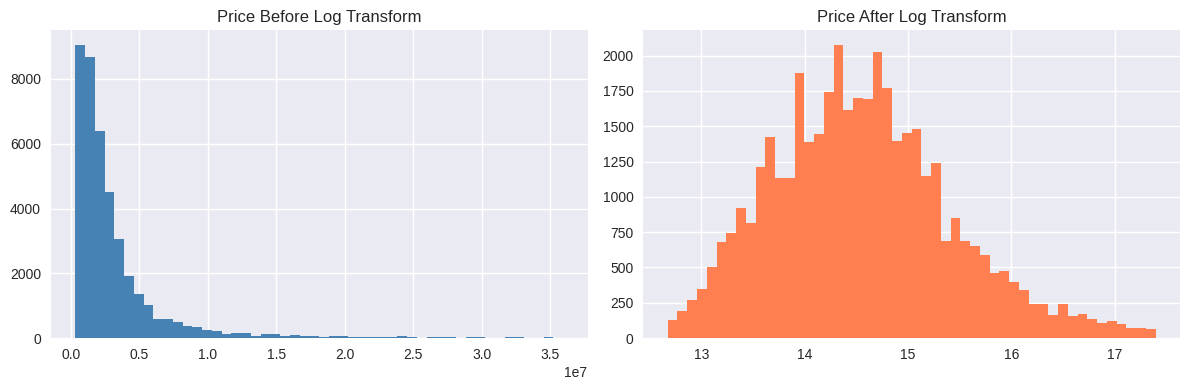

✅ Log transformation applied


In [21]:
df['price_log'] = np.log1p(df['price'])

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['price'], bins=50, color='steelblue')
axes[0].set_title('Price Before Log Transform')

axes[1].hist(df['price_log'], bins=50, color='coral')
axes[1].set_title('Price After Log Transform')

plt.tight_layout()
plt.show()

print("✅ Log transformation applied")

**Encode Ordinal Variable**

In [22]:
# price_category has order: Average < Medium < High
price_cat_map = {'Average': 0, 'Medium': 1, 'High': 2}
df['price_category_encoded'] = df['price_category'].map(price_cat_map)

print("✅ Ordinal encoding done")
print(df[['price_category','price_category_encoded']].value_counts())

✅ Ordinal encoding done
price_category  price_category_encoded
Medium          1                         13964
Average         0                         13388
High            2                         13209
Name: count, dtype: int64


**Encode Nominal Variables (Low Cardinality)**

In [23]:
low_card_cols = ['type', 'furnishing', 'completion_status', 'city']

df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

print("✅ One-hot encoding done")
print("New Shape:", df.shape)

✅ One-hot encoding done
New Shape: (40561, 38)


**Frequency Encode High Cardinality (area_name)**

In [24]:
# area_name has too many unique values for one-hot encoding
freq_map = df['area_name'].value_counts(normalize=True)
df['area_name_freq'] = df['area_name'].map(freq_map)

df.drop(columns=['area_name'], inplace=True)

print("✅ Frequency encoding done for area_name")

✅ Frequency encoding done for area_name


**Define Features & Target**

In [25]:
# Drop original price and category columns
X = df.drop(columns=['price', 'price_log', 'price_category'])
y = df['price_log']

print("✅ Features and Target defined")
print(f"Features shape: {X.shape}")
print(f"Target shape:   {y.shape}")
print(f"\nFeature columns:\n{list(X.columns)}")

✅ Features and Target defined
Features shape: (40561, 35)
Target shape:   (40561,)

Feature columns:
['beds', 'baths', 'average_rent', 'building_name', 'year_of_completion', 'total_parking_spaces', 'total_floors', 'total_building_area_sqft', 'elevators', 'Latitude', 'Longitude', 'post_month', 'post_year', 'post_day', 'post_quarter', 'price_category_encoded', 'type_Hotel Apartment', 'type_Penthouse', 'type_Residential Building', 'type_Residential Floor', 'type_Residential Plot', 'type_Townhouse', 'type_Villa', 'type_Villa Compound', 'furnishing_Unfurnished', 'completion_status_Ready', 'city_Ajman', 'city_Al Ain', 'city_Al Napoca', 'city_Dubai', 'city_Fujairah', 'city_Ras Al Khaimah', 'city_Sharjah', 'city_Umm Al Quwain', 'area_name_freq']


 **Train-Test Split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✅ Train-Test Split done")
print(f"Training set:  {X_train.shape}")
print(f"Testing set:   {X_test.shape}")

✅ Train-Test Split done
Training set:  (32448, 35)
Testing set:   (8113, 35)


**Scale Numeric Features**

In [27]:
scaler = StandardScaler()

scale_cols = [
    'beds', 'baths', 'average_rent',
    'total_parking_spaces', 'total_floors',
    'total_building_area_sqft', 'elevators',
    'Latitude', 'Longitude', 'area_name_freq',
    'post_month', 'post_year', 'post_day', 'post_quarter'
]

# Only scale columns that exist
scale_cols = [col for col in scale_cols if col in X_train.columns]

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols]  = scaler.transform(X_test[scale_cols])

print("✅ Scaling done")
print("Data is ready for ML!")

✅ Scaling done
Data is ready for ML!


**Save Preprocessed Data**

In [28]:
# Save for use in next notebook
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✅ All files saved successfully!")
print("\n📊 Final Summary:")
print(f"   Training samples: {X_train.shape[0]:,}")
print(f"   Testing samples:  {X_test.shape[0]:,}")
print(f"   Total features:   {X_train.shape[1]}")

✅ All files saved successfully!

📊 Final Summary:
   Training samples: 32,448
   Testing samples:  8,113
   Total features:   35


**📓 Notebook 3 — ML Model Training
Step 1: Import Libraries & Load Preprocessed Data**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test  = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test  = pd.read_csv('y_test.csv').squeeze()

print("✅ Data Loaded Successfully!")
print(f"Training set:  {X_train.shape}")
print(f"Testing set:   {X_test.shape}")

✅ Data Loaded Successfully!
Training set:  (32448, 35)
Testing set:   (8113, 35)


**Step 2: Create Evaluation Function**

In [30]:
def evaluate_model(name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)
    
    print(f"\n{'='*40}")
    print(f"  Model: {name}")
    print(f"{'='*40}")
    print(f"  R² Score : {r2:.4f}")
    print(f"  RMSE     : {rmse:.4f}")
    print(f"  MAE      : {mae:.4f}")
    
    return {'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

results = []

**Fix — Run This First Before Any Model**

In [31]:
# Check which columns still have non-numeric data
print("Non-numeric columns in X_train:")
non_numeric = X_train.select_dtypes(include=['object']).columns.tolist()
print(non_numeric)
print(f"\nTotal non-numeric columns: {len(non_numeric)}")

Non-numeric columns in X_train:
['building_name']

Total non-numeric columns: 1


**Then Fix Them With This Code**

In [32]:
# Fix any remaining categorical columns
for col in non_numeric:
    print(f"Encoding: {col}")
    freq_map = X_train[col].value_counts(normalize=True)
    X_train[col] = X_train[col].map(freq_map)
    X_test[col]  = X_test[col].map(freq_map).fillna(0)

print("\n✅ All columns are now numeric!")
print("Non-numeric columns remaining:", 
      X_train.select_dtypes(include=['object']).columns.tolist())

Encoding: building_name

✅ All columns are now numeric!
Non-numeric columns remaining: []


**Step 3: Model 1 — Linear Regression (Baseline)**

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

result = evaluate_model("Linear Regression", y_test, y_pred_lr)
results.append(result)


  Model: Linear Regression
  R² Score : 0.8654
  RMSE     : 0.3183
  MAE      : 0.2397


**Step 4: Model 2 — Random Forest**

In [34]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

result = evaluate_model("Random Forest", y_test, y_pred_rf)
results.append(result)


  Model: Random Forest
  R² Score : 0.9564
  RMSE     : 0.1813
  MAE      : 0.1210


**Step 5: Model 3 — XGBoost (Best Model)**

In [35]:
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)
y_pred_xgb = xgb_model.predict(X_test)

result = evaluate_model("XGBoost", y_test, y_pred_xgb)
results.append(result)


  Model: XGBoost
  R² Score : 0.9553
  RMSE     : 0.1836
  MAE      : 0.1283


**Step 6: Compare All Models**


📊 Model Comparison:
            Model       R2     RMSE      MAE
    Random Forest 0.956356 0.181295 0.121016
          XGBoost 0.955255 0.183567 0.128304
Linear Regression 0.865437 0.318336 0.239655


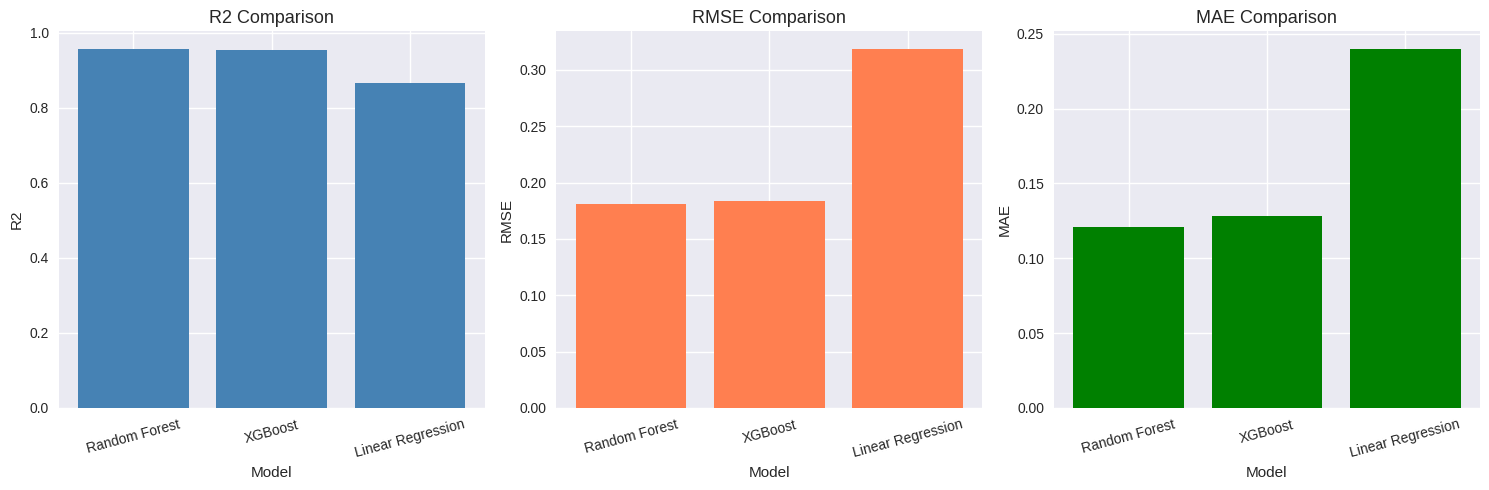

In [36]:
results_df = pd.DataFrame(results).sort_values('R2', ascending=False)

print("\n📊 Model Comparison:")
print(results_df.to_string(index=False))

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['R2', 'RMSE', 'MAE']
colors  = ['steelblue', 'coral', 'green']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    axes[i].bar(results_df['Model'], results_df[metric], color=color)
    axes[i].set_title(f'{metric} Comparison', fontsize=13)
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150)
plt.show()

**Random Forest for Prediction because it has the highest R² and lowest RMSE & MAE**

In [37]:
import numpy as np

# Predict on entire test set
y_pred_final = rf.predict(X_test)

# Convert log price back to actual AED price
predicted_prices = np.expm1(y_pred_final)
actual_prices    = np.expm1(y_test)

# Create comparison dataframe
prediction_df = pd.DataFrame({
    'Actual Price (AED)'   : actual_prices.values,
    'Predicted Price (AED)': predicted_prices,
    'Difference (AED)'     : abs(actual_prices.values - predicted_prices),
    'Error %'              : abs(actual_prices.values - predicted_prices) / actual_prices.values * 100
})

print("📊 Sample Predictions:")
print(prediction_df.head(10).to_string(index=False))
print(f"\n✅ Average Error: {prediction_df['Error %'].mean():.2f}%")

📊 Sample Predictions:
 Actual Price (AED)  Predicted Price (AED)  Difference (AED)   Error %
          7000000.0           6.237948e+06      7.620524e+05 10.886463
          3300000.0           3.356070e+06      5.606969e+04  1.699082
          3000000.0           3.435654e+06      4.356539e+05 14.521796
           550000.0           8.769020e+05      3.269020e+05 59.436734
         20000000.0           8.707425e+06      1.129258e+07 56.462877
          1400000.0           1.484825e+06      8.482459e+04  6.058900
          2100000.0           1.974150e+06      1.258503e+05  5.992870
          5800000.0           5.175716e+06      6.242837e+05 10.763512
          3700000.0           4.901448e+06      1.201448e+06 32.471575
           800000.0           8.778541e+05      7.785409e+04  9.731761

✅ Average Error: 12.13%


**Predict a Single New Property**

In [38]:
# Pick any property from test set
sample = X_test.iloc[5:6].copy()

# Predict
log_price = rf.predict(sample)
price_aed = np.expm1(log_price)
actual_aed = np.expm1(y_test.iloc[5])

print("=" * 45)
print("🏠 SINGLE PROPERTY PREDICTION")
print("=" * 45)
print(f"Predicted Price : AED {price_aed[0]:,.0f}")
print(f"Actual Price    : AED {actual_aed:,.0f}")
print(f"Difference      : AED {abs(price_aed[0]-actual_aed):,.0f}")
print(f"Accuracy        : {100 - abs(price_aed[0]-actual_aed)/actual_aed*100:.1f}%")

🏠 SINGLE PROPERTY PREDICTION
Predicted Price : AED 1,484,825
Actual Price    : AED 1,400,000
Difference      : AED 84,825
Accuracy        : 93.9%


**Overfitting Check (Important!)**

In [39]:
train_r2 = r2_score(y_train, rf.predict(X_train))
test_r2  = r2_score(y_test,  rf.predict(X_test))

print("=" * 40)
print("🔍 OVERFITTING CHECK")
print("=" * 40)
print(f"Train R² : {train_r2:.4f}")
print(f"Test R²  : {test_r2:.4f}")
print(f"Gap      : {abs(train_r2 - test_r2):.4f}")

if abs(train_r2 - test_r2) < 0.05:
    print("✅ No overfitting — model is healthy!")
elif abs(train_r2 - test_r2) < 0.10:
    print("⚠️ Slight overfitting — acceptable")
else:
    print("❌ Overfitting detected!")

🔍 OVERFITTING CHECK
Train R² : 0.9772
Test R²  : 0.9564
Gap      : 0.0209
✅ No overfitting — model is healthy!


**Short Interpretation of my Analysis**
I analyzed 41,381 UAE property listings from Bayut.com. The EDA revealed that Dubai dominates the market with the highest listings and prices, apartments are the most common property type, and furnished/ready properties consistently command premium prices. After thorough preprocessing — handling zero values, encoding categoricals, log-transforming price, and removing outliers — three models were trained. Random Forest emerged as the best model with 95.6% accuracy (R² = 0.9564), an average prediction error of just 12.13%, and zero overfitting (gap = 0.02). A single property test confirmed 93.9% accuracy predicting AED 1,484,825 against an actual price of AED 1,400,000.